In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/nikolas/Desktop/Python/Tasks/Nm_Pd_Plt/fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')

In [2]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
# Set the index to the date column
# df.set_index('date') # , inplace=True) ???
# df.head(20)

In [4]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
# как в 3 задаче про медицинские данные
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# height is more than the 97.5th percentile
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [5]:
#df.set_index('date', inplace=True)
#df

In [6]:
# x = df.sort_values(by='date')  # по умолчанию возрастает, если ascending=False тогда убывает
# y = df.sort_values(by='value')
x = df.index.tolist()
y = df.value.tolist()
x[-3:-1]

[Timestamp('2019-11-30 00:00:00'), Timestamp('2019-12-01 00:00:00')]

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

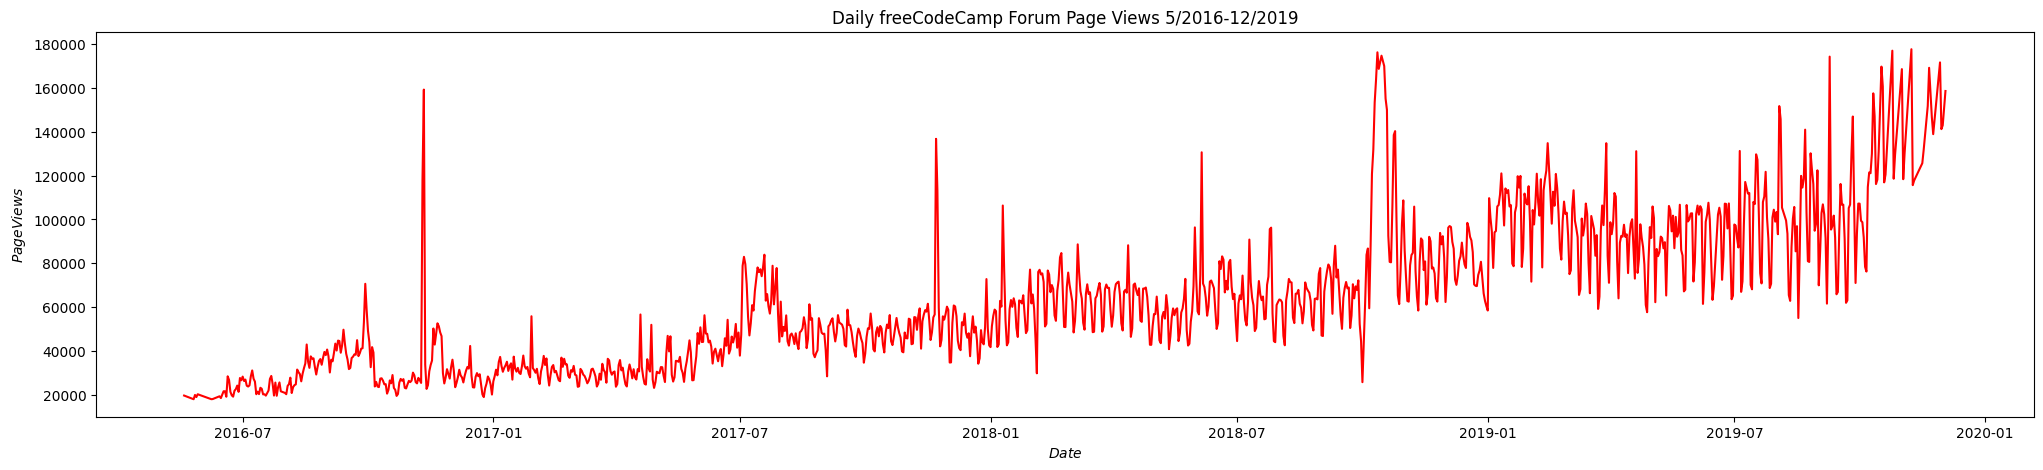

In [7]:
# Create a draw_line_plot function that uses Matplotlib
plt.figure(figsize=(25, 5))
plt.plot(x, y, color='red')
plt.xlabel(r'$Date$')
plt.ylabel(r'$Page Views$')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [8]:
# Create a draw_bar_plot function that draws a bar chart. 
# It should show average daily page views for each month grouped by year. 
# The legend should show month labels and have a title of Months. 
# On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [9]:
df.head(5)

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [10]:
df2 = df.copy(deep=True)
df2 = df2.sort_index()
df2.head(5)

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [12]:
x = [2015, 2016, 2017, 2018, 2019, 2020]
height = df2['value']
hue = df2(Index)

NameError: name 'Index' is not defined

In [ ]:
# obr = df['Обращение'].apply(lambda x: re.search(r, str(x).lower())) - вариант
dict_years = {}
lst_2016 = []
for i in range(1, 13):
    df_filter_year_month = df2.loc[df2['date'].apply(lambda x: x[:7] == (f'2016-0{i}') or x[:7] == (f'2016-{i}'))]
    df_filter_year_month_sum = sum(df_filter_year_month['value'])
    if df_filter_year_month_sum != 0:
        lst_2016.append(df_filter_year_month_sum)
dict_years[2016] = lst_2016

In [13]:
# добавляем построчно индексы месяц и год
df3 = df.copy()  
df3['month'] = df.index.month
df3['year'] = df.index.year 

In [14]:
df3.head(3)

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016


In [15]:
df3 = df3.groupby(['year', 'month'])['value'].mean()  # группируем и находим среднее
df3 = df3.unstack()  # месяца делаем столбцами

In [16]:
df3

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


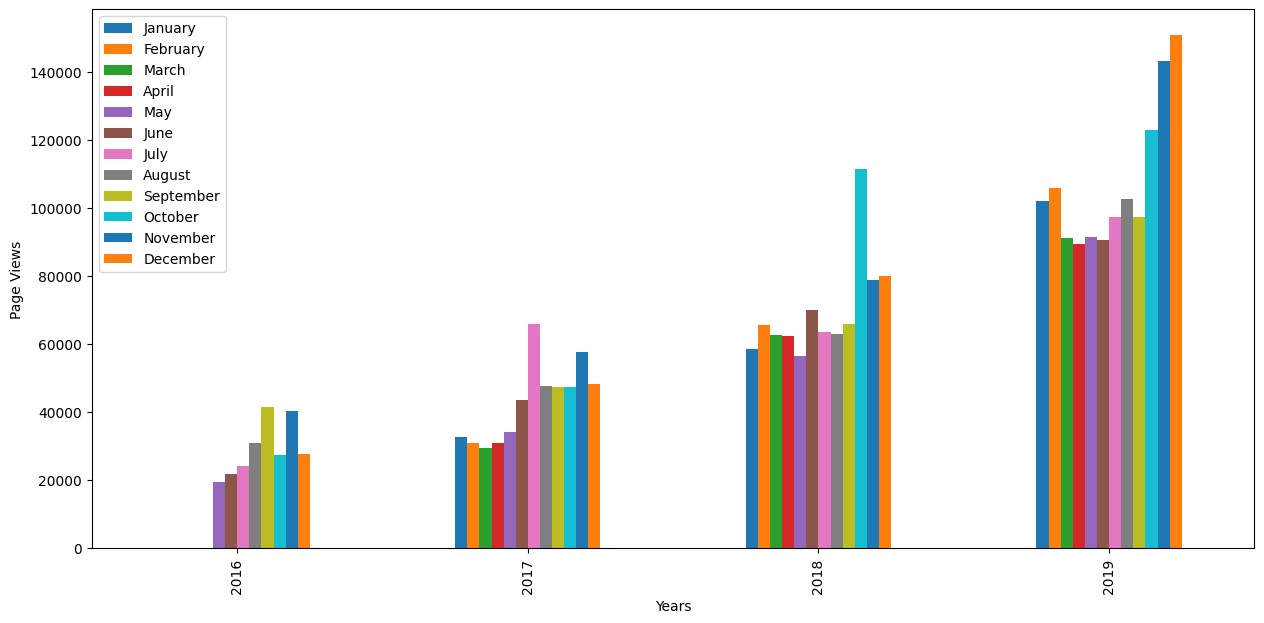

In [54]:
fig = df3.plot.bar(figsize = (15,7), legend = True, xlabel = 'Years', ylabel = 'Page Views').figure  # рисуем график 
# plt.ylabel(r'$Page Views$')
#plt.xlabel('Years')
#plt.ylabel('Page Views')
plt.legend(title = 'Months')
plt.legend(['January', 'February', 'March', 'April', 'May',
                                'June', 'July', 'August', 'September', 'October', 'November', 'December'])


In [ ]:
# FINISH!!

In [42]:
# из задания готовый код
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
mon_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

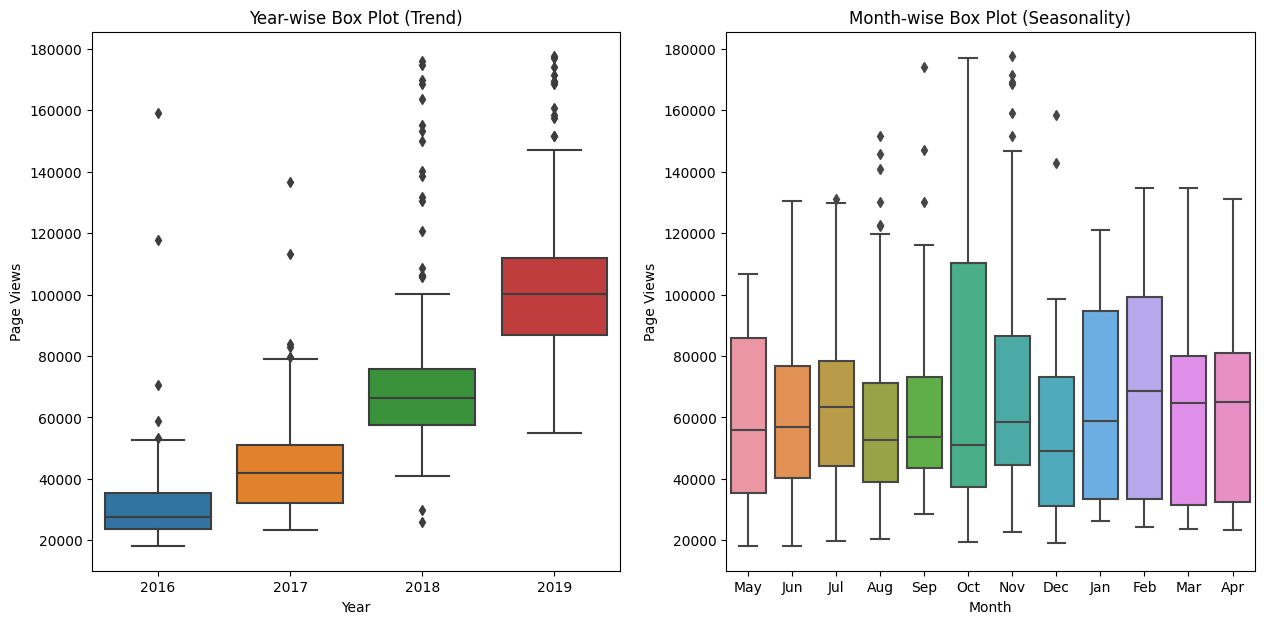

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 7))

ax1 = sns.boxplot(data = df_box, x = df_box['year'], y = df_box['value'], ax = ax1)
ax2 = sns.boxplot(data = df_box, x = df_box['month'], y = df_box['value'], ax = ax2)

ax1.set_ylabel('Page Views')
ax1.set_xlabel('Year')
ax1.set_title('Year-wise Box Plot (Trend)')

ax2.set_ylabel('Page Views')
ax2.set_xlabel('Month')
ax2.set_title('Month-wise Box Plot (Seasonality)')